# Plot VQE results
Plots VQE ground energies of the H2 molecule over different bond distances stored in a csv file.
Notebook created by **Jonas Jaeger** <jojaeger@cs.ubc.ca>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dissociation_vals.csv")
df = df.sort_values(by=["VQE IBMQ (error mitigation)", "VQE IBMQ (uncorrected)", "VQE Sim"])
df = df.drop_duplicates(subset="Distance", keep="first")  # removes duplicate rows without IBMQ results
df = df.sort_values(by="Distance")

In [3]:
print(len(df))

106


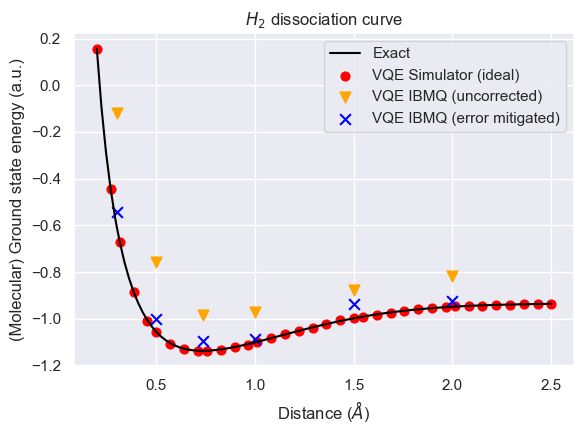

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply the default theme
sns.set_theme()

ax = df.plot(x="Distance", y=["Exact"], linewidth=1.5, figsize=(6, 4.5), grid=True, color="black",
             ylabel="(Molecular) Ground state energy (a.u.)", title="$H_2$ dissociation curve",
             xlabel="Distance ($\AA$)")
ax.scatter(x=df["Distance"][::3], y=df["VQE Sim"][::3], label="VQE Simulator (ideal)", marker="o", s=40, color="red")
ax.scatter(x=df["Distance"], y=df["VQE IBMQ (uncorrected)"], label="VQE IBMQ (uncorrected)", marker="v", s=60, color="orange")
ax.scatter(x=df["Distance"], y=df["VQE IBMQ (error mitigation)"], label="VQE IBMQ (error mitigated)", marker="x", s=60, color="blue")
ax.legend()
plt.tight_layout()
plt.savefig("plot.pdf")